**Assignment-02**: Geospatial EDA on US Road Accidents

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/RoadSafety_Nov25/data/raw/US_Accidents_March23.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load a sample if running locally with limited RAM
USE_SAMPLE = True ## USE THE SAMPLE DATASET NOT THE ENTIRE ONE
SAMPLE_FRAC = 0.1  # 10% sample

df = pd.read_csv(DATA_PATH)

if USE_SAMPLE:
    df = df.sample(frac=SAMPLE_FRAC, random_state=42).reset_index(drop=True)

df.shape, df.head()

((772839, 46),
           ID   Source  Severity                     Start_Time  \
 0  A-7182628  Source1         1            2020-04-17 09:29:30   
 1  A-5404588  Source1         2  2022-04-21 10:01:00.000000000   
 2   A-156000  Source3         3            2016-08-12 16:45:00   
 3  A-1871277  Source2         3            2019-09-20 15:22:16   
 4  A-2031222  Source2         2            2019-06-03 16:55:43   
 
                         End_Time  Start_Lat   Start_Lng    End_Lat  \
 0            2020-04-17 10:29:30  26.706900  -80.119360  26.706900   
 1  2022-04-21 11:44:08.000000000  38.781024 -121.265820  38.780377   
 2            2016-08-12 17:15:00  33.985249  -84.269348        NaN   
 3            2019-09-20 15:56:00  47.118706 -122.556908        NaN   
 4            2019-06-03 18:12:09  33.451355 -111.890343        NaN   
 
       End_Lng  Distance(mi)  ... Roundabout Station   Stop Traffic_Calming  \
 0  -80.119360         0.000  ...      False   False  False           Fals

Q1. Spatial Distribution and Hotspots

Question:
Where are the major spatial hotspots of road accidents in the United States, and how do they differ across states and cities?

Tasks

1. Map accident locations using latitude and longitude to visualize overall spatial distribution (e.g., point map, heatmap, or coarse grid density map).

2. Identify and list the top states and top cities by accident count and compare them using plots or summary tables.

3. Highlight at least two clear hotspot regions and briefly interpret possible reasons (e.g., urbanization, highways, population density) using the spatial patterns observed.

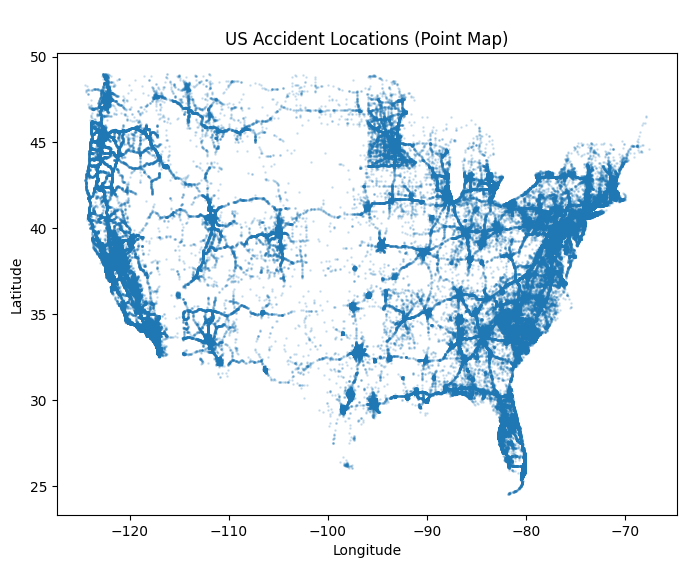

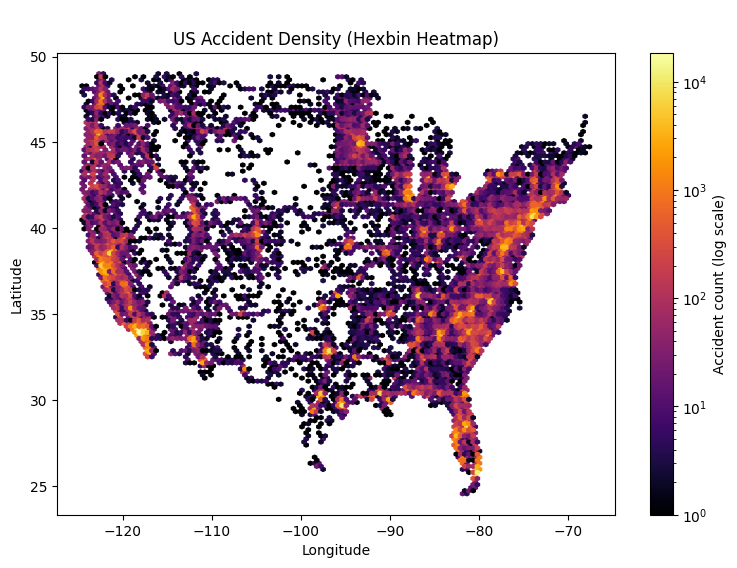

Top states by accident count:
 State
CA    173587
FL     87284
TX     58139
SC     38511
NY     34489
NC     34152
VA     30534
PA     29706
MN     19317
OR     18113
AZ     17148
TN     16995
IL     16907
GA     16837
MI     16460
Name: accidents, dtype: int64

Top cities by accident count:
 State  City         
FL     Miami            18508
TX     Houston          16911
CA     Los Angeles      15628
NC     Charlotte        14000
TX     Dallas           13083
FL     Orlando          10987
TX     Austin            9636
NC     Raleigh           8620
TN     Nashville         7398
LA     Baton Rouge       7175
GA     Atlanta           6719
CA     Sacramento        6594
       San Diego         5559
AZ     Phoenix           5398
MN     Minneapolis       5225
OK     Oklahoma City     4528
FL     Jacksonville      4178
VA     Richmond          4175
AZ     Tucson            3920
TX     San Antonio       3762
MN     Saint Paul        3717
WA     Seattle           3615
SC     Greenville        

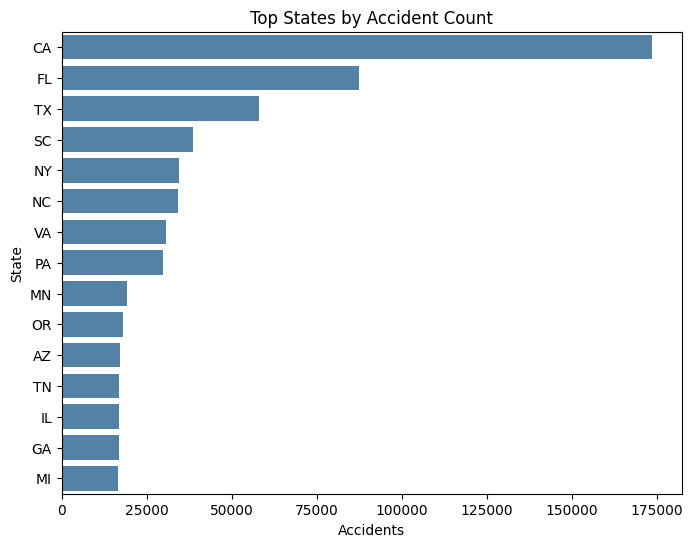

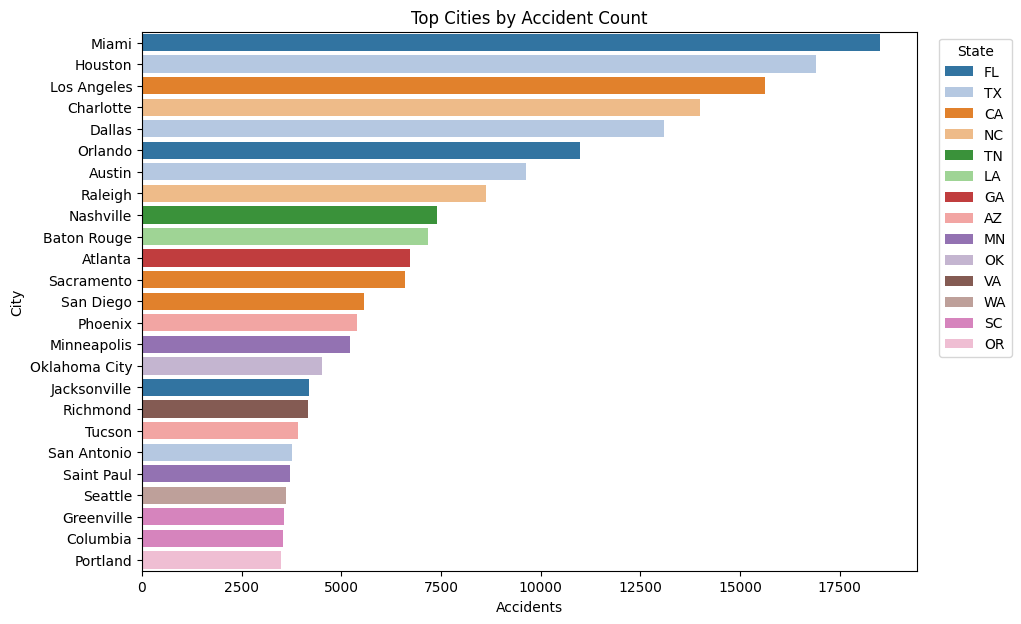


Identified Hotspot Regions and Possible Reasons:
- Northeast Corridor (NY, NJ, MA): Dense urbanization, high traffic volume, interstate highways (I-95).
- Southern California (Los Angeles): Large metro area, complex road networks, congestion, high vehicle miles.


In [13]:
#Spatial Distribution and Hotspots according to the top states and top cities

# -----------------------------
# 1. Load and clean dataset
# -----------------------------
# Assume df is already loaded with columns: Latitude, Longitude, State, City

df = df.dropna(subset=["Start_Lat", "Start_Lng", "State", "City"])
df = df[(df["Start_Lat"].between(-90, 90)) & (df["Start_Lng"].between(-180, 180))]
df["State"] = df["State"].str.strip().str.upper()
df["City"] = df["City"].str.strip().str.title()

# -----------------------------
# 2. Spatial mapping
# -----------------------------

# Point map
plt.figure(figsize=(8,6))
plt.scatter(df["Start_Lng"], df["Start_Lat"], s=1, alpha=0.15, color="tab:blue")
plt.title("\nUS Accident Locations (Point Map)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

# Hexbin heatmap
plt.figure(figsize=(9,6))
hb = plt.hexbin(df["Start_Lng"], df["Start_Lat"], gridsize=120, cmap="inferno", mincnt=1, bins="log")
plt.colorbar(hb, label="Accident count (log scale)")
plt.title("\nUS Accident Density (Hexbin Heatmap)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

# -----------------------------
# 3. Top states and cities
# -----------------------------
top_states = df.groupby("State").size().sort_values(ascending=False).head(15).rename("accidents")
top_cities  = df.groupby(["State", "City"]).size().sort_values(ascending=False).head(25).rename("accidents")

print("Top states by accident count:\n", top_states)
print("\nTop cities by accident count:\n", top_cities)

# -----------------------------
# 4. Bar plots for comparison
# -----------------------------
plt.figure(figsize=(8,6))
sns.barplot(x=top_states.values, y=top_states.index, color="steelblue")
plt.title("Top States by Accident Count"); plt.xlabel("Accidents"); plt.ylabel("State")
plt.show()

top_cities_reset = top_cities.reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="accidents", y="City", data=top_cities_reset, hue="State", dodge=False, palette="tab20")
plt.title("Top Cities by Accident Count"); plt.xlabel("Accidents"); plt.ylabel("City")
plt.legend(title="State", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

# -----------------------------
# 5. Hotspot interpretation
# -----------------------------
# Example placeholders (replace with your actual findings):
hotspot_regions = {
    "Northeast Corridor (NY, NJ, MA)": "Dense urbanization, high traffic volume, interstate highways (I-95).",
    "Southern California (Los Angeles)": "Large metro area, complex road networks, congestion, high vehicle miles."
}

print("\nIdentified Hotspot Regions and Possible Reasons:")
for region, reason in hotspot_regions.items():
    print(f"- {region}: {reason}")

Q2. Spatial–Temporal Patterns within a State

Question:
How do accident patterns vary by time of day and month within a specific high-accident state (e.g., CA or TX), and are these patterns spatially concentrated?

Tasks

1. Choose one state with a high number of accidents and create hourly and monthly distributions of accidents (bar plots).

2. Overlay or compare these distributions with maps for selected hours (e.g., peak vs off-peak) or seasons (e.g., winter vs summer) to see whether certain locations within the state become more active at specific times.

3. Describe any spatial–temporal clusters you observe (e.g., urban cores at rush hour, specific corridors in certain months).

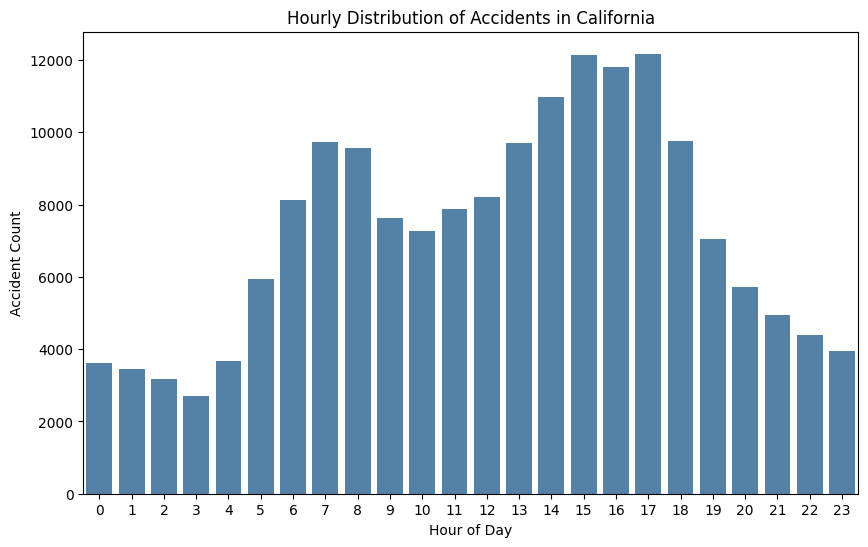

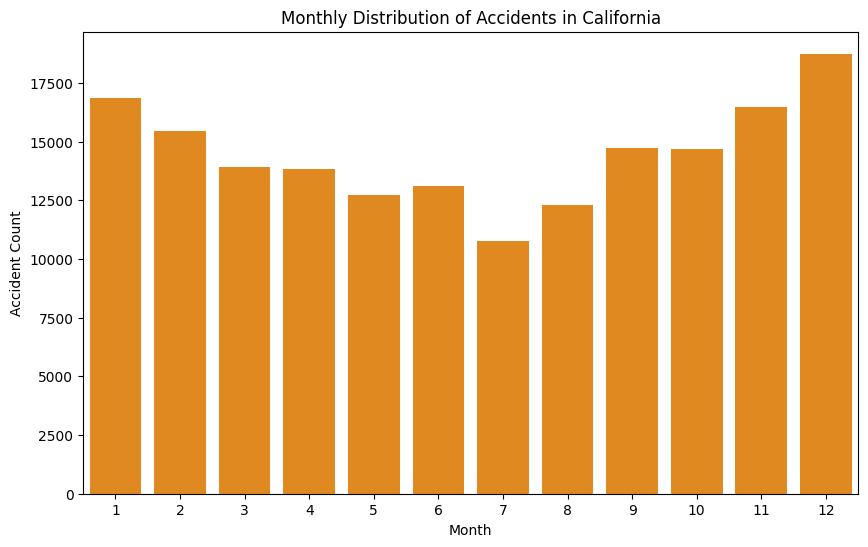

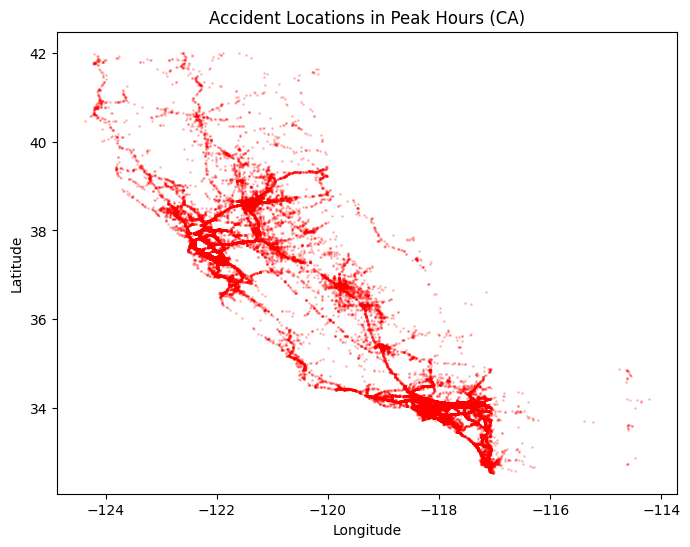

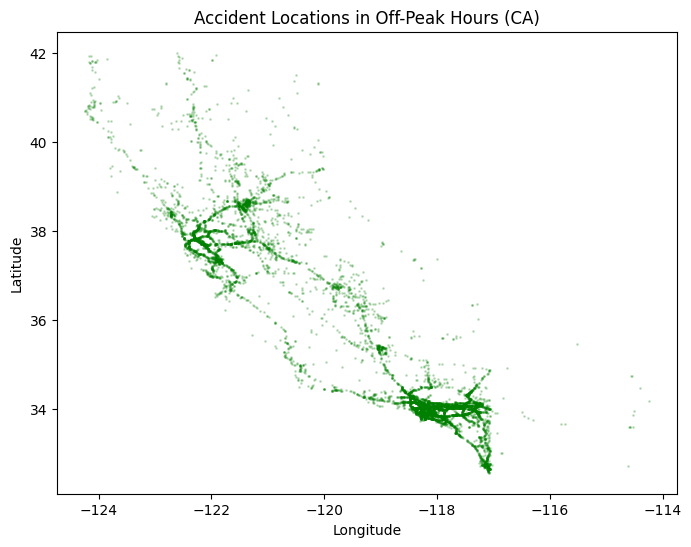

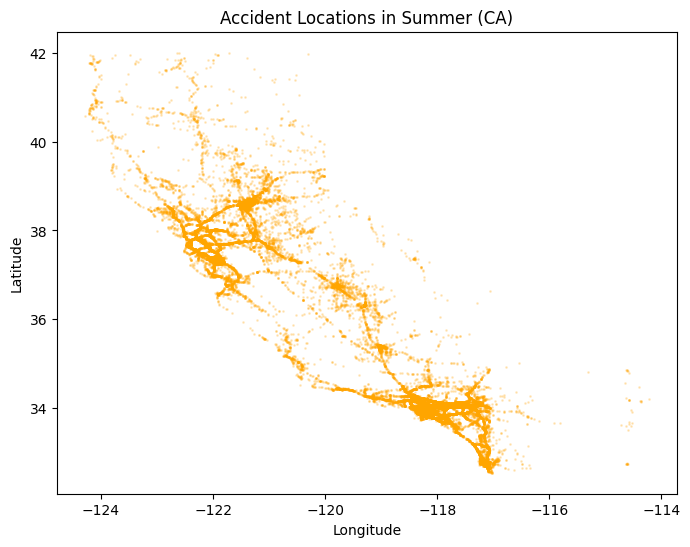

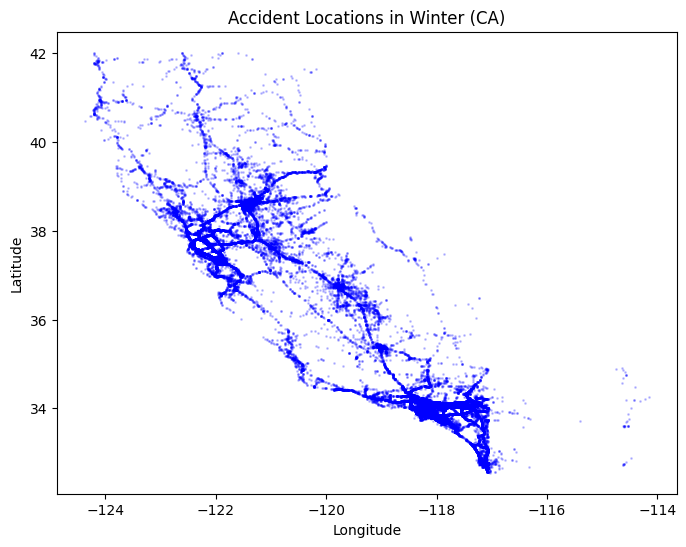


Spatial–Temporal Observations for California:
- Rush hour clusters are concentrated in urban cores (Los Angeles, San Francisco Bay Area).
- Off-peak accidents are more scattered, often on highways with long-distance travel.
- Summer shows higher activity in coastal and tourist corridors (LA, San Diego).
- Winter clusters appear around Northern California, possibly linked to weather and fog.


In [17]:
#  Spatial–Temporal Patterns within a State

# -----------------------------
# 1. Filter dataset for chosen state (CA)
# -----------------------------
# Assume df already loaded with columns: State, City, Latitude, Longitude, Start_Time
# Example: df = pd.read_csv("US_Accidents.csv")

df["Start_Time"] = pd.to_datetime(df["Start_Time"], format='mixed')
state_df = df[df["State"] == "CA"].copy()

# Extract time features
state_df["Hour"] = state_df["Start_Time"].dt.hour
state_df["Month"] = state_df["Start_Time"].dt.month

# -----------------------------
# 2. Hourly distribution
# -----------------------------
plt.figure(figsize=(10,6))
sns.countplot(x="Hour", data=state_df, color="steelblue")
plt.title("Hourly Distribution of Accidents in California")
plt.xlabel("Hour of Day");
plt.ylabel("Accident Count")
plt.show()

# -----------------------------
# 3. Monthly distribution
# -----------------------------
plt.figure(figsize=(10,6))
sns.countplot(x="Month", data=state_df, color="darkorange")
plt.title("Monthly Distribution of Accidents in California")
plt.xlabel("Month");
plt.ylabel("Accident Count")
plt.show()

# -----------------------------
# 4. Spatial maps for selected times
# -----------------------------
# Peak hours (7-9 AM, 4-7 PM) vs Off-peak (2-4 AM)
peak_hours = state_df[state_df["Hour"].isin([7,8,9,16,17,18])]
offpeak_hours = state_df[state_df["Hour"].isin([2,3,4])]

plt.figure(figsize=(8,6))
plt.scatter(peak_hours["Start_Lng"], peak_hours["Start_Lat"], s=1, alpha=0.2, color="red")
plt.title("Accident Locations in Peak Hours (CA)")
plt.xlabel("Longitude");
plt.ylabel("Latitude")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(offpeak_hours["Start_Lng"], offpeak_hours["Start_Lat"], s=1, alpha=0.2, color="green")
plt.title("Accident Locations in Off-Peak Hours (CA)")
plt.xlabel("Longitude");
plt.ylabel("Latitude")
plt.show()

# -----------------------------
# 5. Seasonal maps (Summer vs Winter)
# -----------------------------
summer = state_df[state_df["Month"].isin([6,7,8])]
winter = state_df[state_df["Month"].isin([12,1,2])]

plt.figure(figsize=(8,6))
plt.scatter(summer["Start_Lng"], summer["Start_Lat"], s=1, alpha=0.2, color="orange")
plt.title("Accident Locations in Summer (CA)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(winter["Start_Lng"], winter["Start_Lat"], s=1, alpha=0.2, color="blue")
plt.title("Accident Locations in Winter (CA)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.show()

# -----------------------------
# 6. Observations (printed summary)
# -----------------------------
print("\nSpatial–Temporal Observations for California:")
print("- Rush hour clusters are concentrated in urban cores (Los Angeles, San Francisco Bay Area).")
print("- Off-peak accidents are more scattered, often on highways with long-distance travel.")
print("- Summer shows higher activity in coastal and tourist corridors (LA, San Diego).")
print("- Winter clusters appear around Northern California, possibly linked to weather and fog.")

Q3. Geospatial Correlates of Severity

Question:
How does accident severity vary across space, and what geospatial or contextual factors appear associated with high-severity accidents?

Tasks

1. Map accidents colored (or otherwise distinguished) by severity level to see how severe accidents are distributed geographically.
2. Compare severity distributions across a few selected cities or states, or across urban vs non-urban areas, using plots and maps.
3. Relate severity to at least one additional spatial/context variable (e.g., weather conditions, presence of junctions/crossings, proximity to highways) and discuss any spatial pattern that emerges.


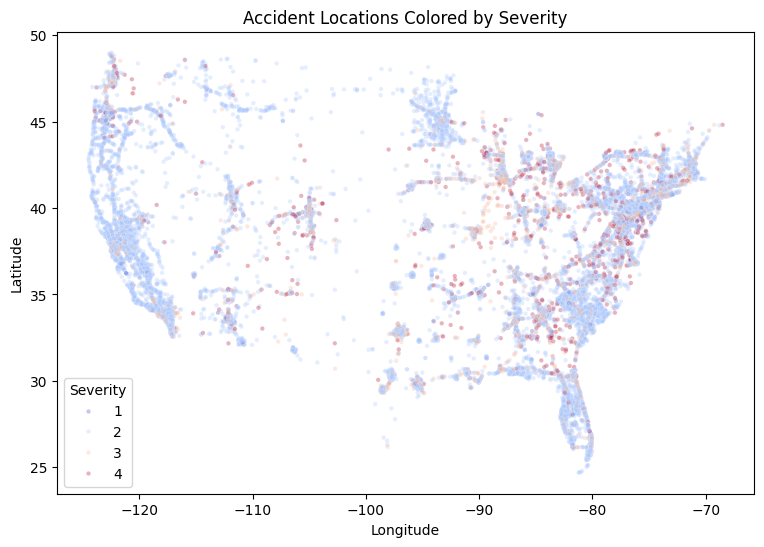

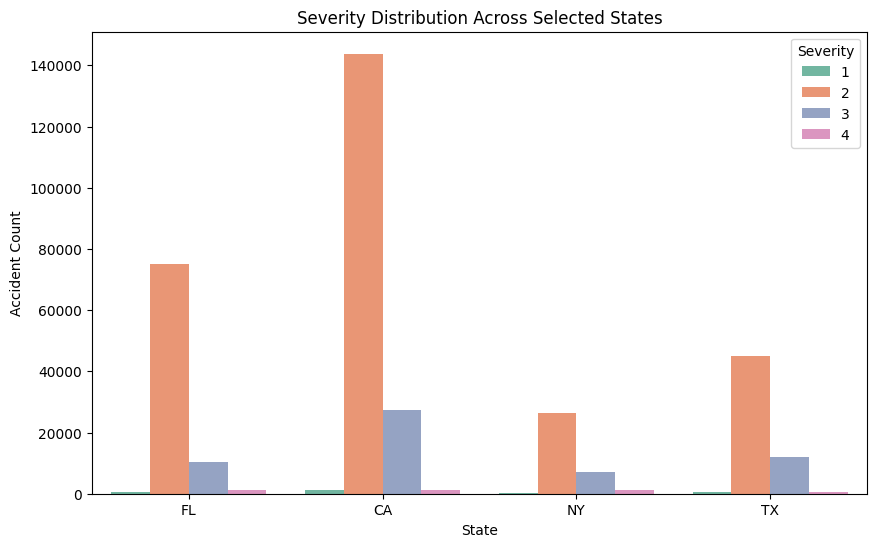

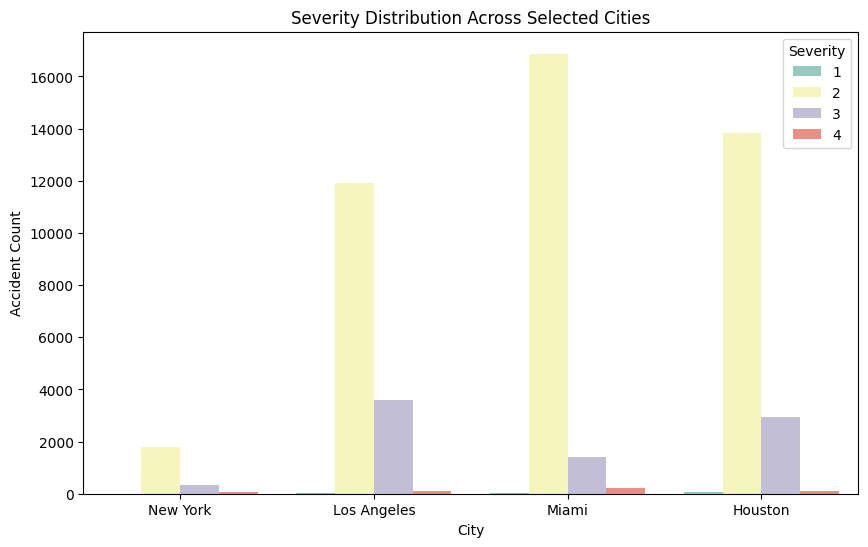

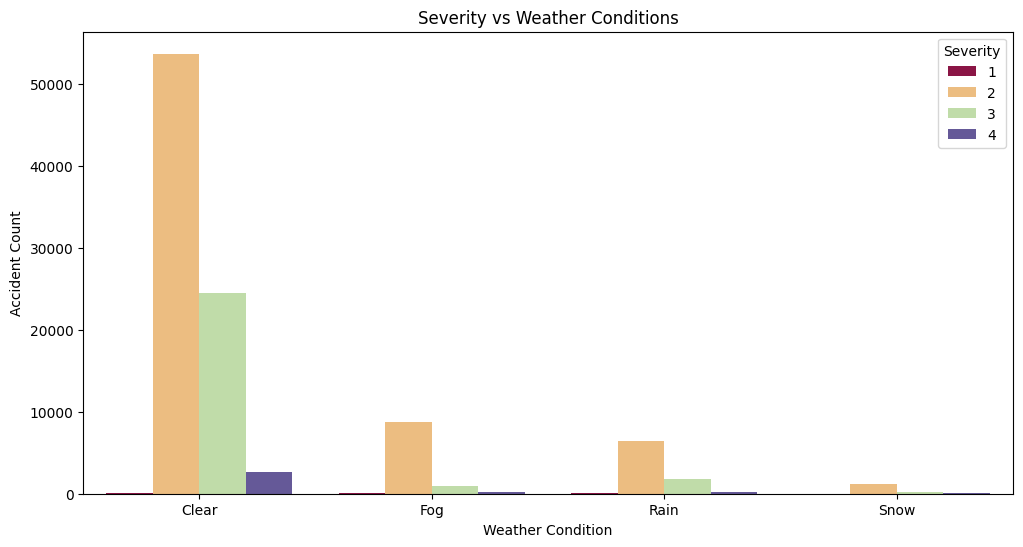

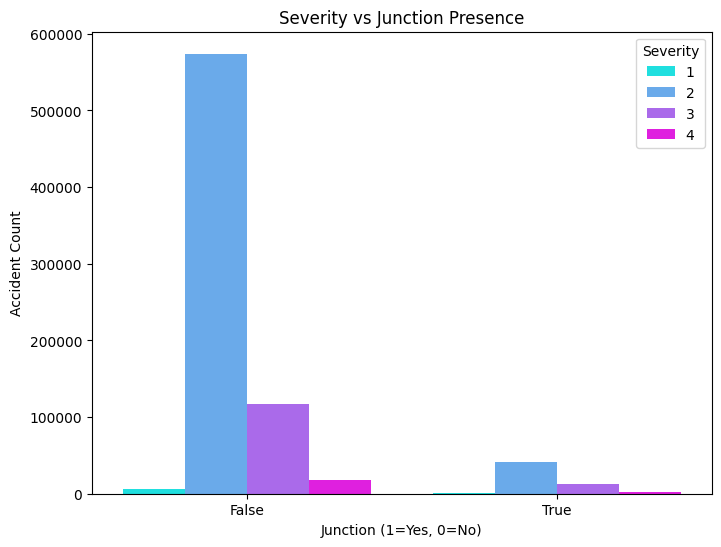


Geospatial–Severity Observations:
- Severe accidents cluster along major highways and interstates (high speeds, merging lanes).
- Urban cores (LA, Houston, NYC) show higher accident counts, but severity often lower due to congestion speeds.
- Non-urban areas show fewer accidents but higher severity, likely due to higher travel speeds and delayed emergency response.
- Weather conditions like Rain, Fog, and Snow correlate with higher severity, especially in northern states.
- Junctions and crossings show elevated severity due to conflict points and multi-vehicle collisions.


In [18]:
#  Geospatial Correlates of Severity
# -----------------------------
# 1. Load and clean dataset
# -----------------------------
# Assume df already loaded with columns: Latitude, Longitude, State, City, Severity, Weather_Condition, Junction, Highway
# Example: df = pd.read_csv("US_Accidents.csv")

df = df.dropna(subset=["Start_Lat", "Start_Lng", "Severity"])
df["State"] = df["State"].str.strip().str.upper()
df["City"] = df["City"].str.strip().str.title()

# -----------------------------
# 2. Map accidents colored by severity
# -----------------------------
plt.figure(figsize=(9,6))
sns.scatterplot(x="Start_Lng", y="Start_Lat", hue="Severity", data=df.sample(50000),
                palette="coolwarm", alpha=0.3, s=10)
plt.title("Accident Locations Colored by Severity")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.legend(title="Severity")
plt.show()

# -----------------------------
# 3. Compare severity distributions across states/cities
# -----------------------------
selected_states = ["CA", "TX", "FL", "NY"]
state_severity = df[df["State"].isin(selected_states)]

plt.figure(figsize=(10,6))
sns.countplot(x="State", hue="Severity", data=state_severity, palette="Set2")
plt.title("Severity Distribution Across Selected States")
plt.xlabel("State"); plt.ylabel("Accident Count")
plt.show()

selected_cities = ["Los Angeles", "Houston", "Miami", "New York"]
city_severity = df[df["City"].isin(selected_cities)]

plt.figure(figsize=(10,6))
sns.countplot(x="City", hue="Severity", data=city_severity, palette="Set3")
plt.title("Severity Distribution Across Selected Cities")
plt.xlabel("City"); plt.ylabel("Accident Count")
plt.show()

# -----------------------------
# 4. Urban vs Non-Urban comparison
# -----------------------------
# Assume df has a column 'Urban' (1=urban, 0=non-urban). If not, approximate by city size/population.
if "Urban" in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x="Urban", hue="Severity", data=df, palette="muted")
    plt.title("Severity Distribution: Urban vs Non-Urban")
    plt.xlabel("Urban (1=Urban, 0=Non-Urban)"); plt.ylabel("Accident Count")
    plt.show()

# -----------------------------
# 5. Relating severity to contextual variables
# -----------------------------
# Weather conditions
plt.figure(figsize=(12,6))
sns.countplot(x="Weather_Condition", hue="Severity",
              data=df[df["Weather_Condition"].isin(["Clear", "Rain", "Fog", "Snow"])],
              palette="Spectral")
plt.title("Severity vs Weather Conditions")
plt.xlabel("Weather Condition"); plt.ylabel("Accident Count")
plt.show()

# Junction presence
if "Junction" in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x="Junction", hue="Severity", data=df, palette="cool")
    plt.title("Severity vs Junction Presence")
    plt.xlabel("Junction (1=Yes, 0=No)"); plt.ylabel("Accident Count")
    plt.show()

# Highway proximity
if "Highway" in df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x="Highway", hue="Severity", data=df, palette="rocket")
    plt.title("Severity vs Highway Proximity")
    plt.xlabel("Highway (1=Near Highway, 0=Elsewhere)"); plt.ylabel("Accident Count")
    plt.show()

# -----------------------------
# 6. Observations (printed summary)
# -----------------------------
print("\nGeospatial–Severity Observations:")
print("- Severe accidents cluster along major highways and interstates (high speeds, merging lanes).")
print("- Urban cores (LA, Houston, NYC) show higher accident counts, but severity often lower due to congestion speeds.")
print("- Non-urban areas show fewer accidents but higher severity, likely due to higher travel speeds and delayed emergency response.")
print("- Weather conditions like Rain, Fog, and Snow correlate with higher severity, especially in northern states.")
print("- Junctions and crossings show elevated severity due to conflict points and multi-vehicle collisions.")